### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 7938</pre>

In [29]:
# student 1: Israel 7938
# student 2: Eran 6215
# student 3: Avihai 2474
# student 4: Almog 8269
# student 5: Liron 5068
# student 6: Matan 9999

In [30]:
#test

## Part 2 - Experiments
You could add as many code cells as needed

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [32]:
train_set = pd.read_csv('titanic_train.csv')
test_set = pd.read_csv("titanic_test.csv")

In [33]:
train_set.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [34]:
test_set.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [35]:
#Men
survivedMan = train_set[(train_set['Sex'] == 1) & (train_set['Age'] > 18) & (train_set['Survived'] == 1)]
survivedManCount = len(survivedMan)
print("Survived man :",survivedManCount)

#Women
survivedWomen = train_set[(train_set['Sex'] == 0) & (train_set['Age'] > 18) & (train_set['Survived'] == 1)]
survivedWomenCount = len(survivedWomen)
print("survived women:",survivedWomenCount)
#Kids
survivedKids = train_set[(train_set['Age'] <= 18) & (train_set['Survived'] == 1)]
survivedKidsCount = len(survivedKids)
print("survived kids",survivedKidsCount)

survivedCount = len(train_set[train_set['Survived'] == 1])
print("survivels: ",survivedCount)

Survived man : 69
survived women: 156
survived kids 56
survivels:  281


In [36]:
train_set.isnull().sum() 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Visualization

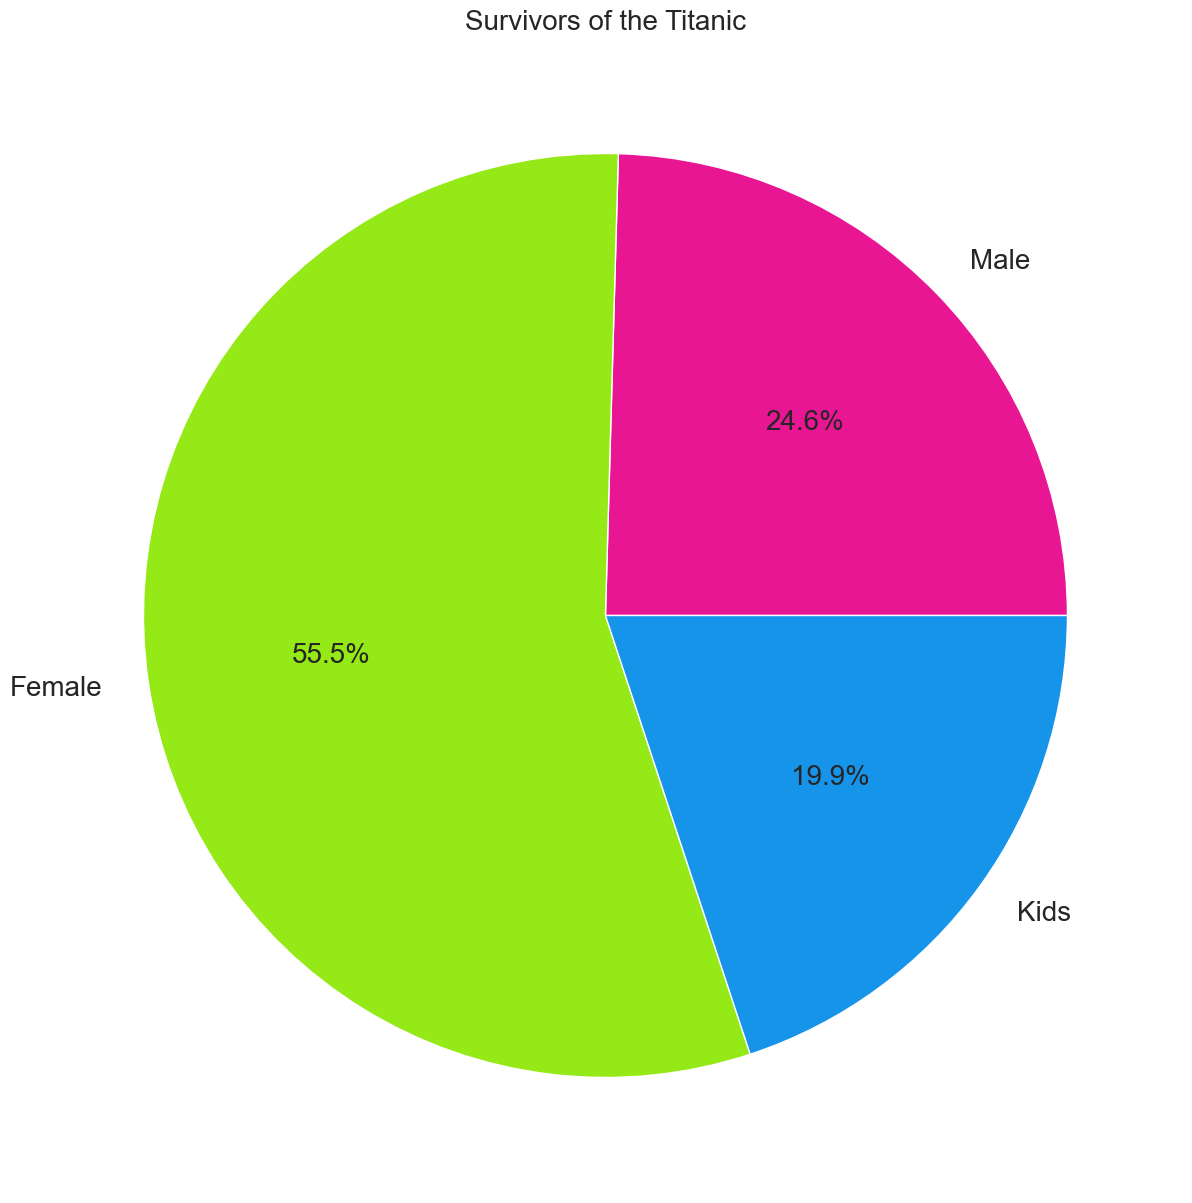

In [37]:
population = [survivedManCount,survivedWomenCount,survivedKidsCount]
labels = ['Male', 'Female','Kids']
colors = ['#E91694', '#94E916', '#1694E9']
fig,ax = plt.subplots(figsize=(20, 15))
ax.pie(population,labels = labels,autopct='%1.1f%%',colors=colors, textprops={'fontsize': 20})
plt.title('Survivors of the Titanic', fontsize=20)
fig.patch.set_facecolor('white')
plt.show()

In [38]:
data = {'Category': ['Male', 'Female', 'Kids', 'Total'],
        'Survived': [survivedManCount, survivedWomenCount, survivedKidsCount, survivedCount]}
Survivors1 = pd.DataFrame(data)
Survivors1['Percentage'] = Survivors1['Survived'].apply(lambda x: round((x / survivedCount) * 100, 1))
Survivors1

,Category,Survived,Percentage
0,Male,69,24.6
1,Female,156,55.5
2,Kids,56,19.9
3,Total,281,100.0


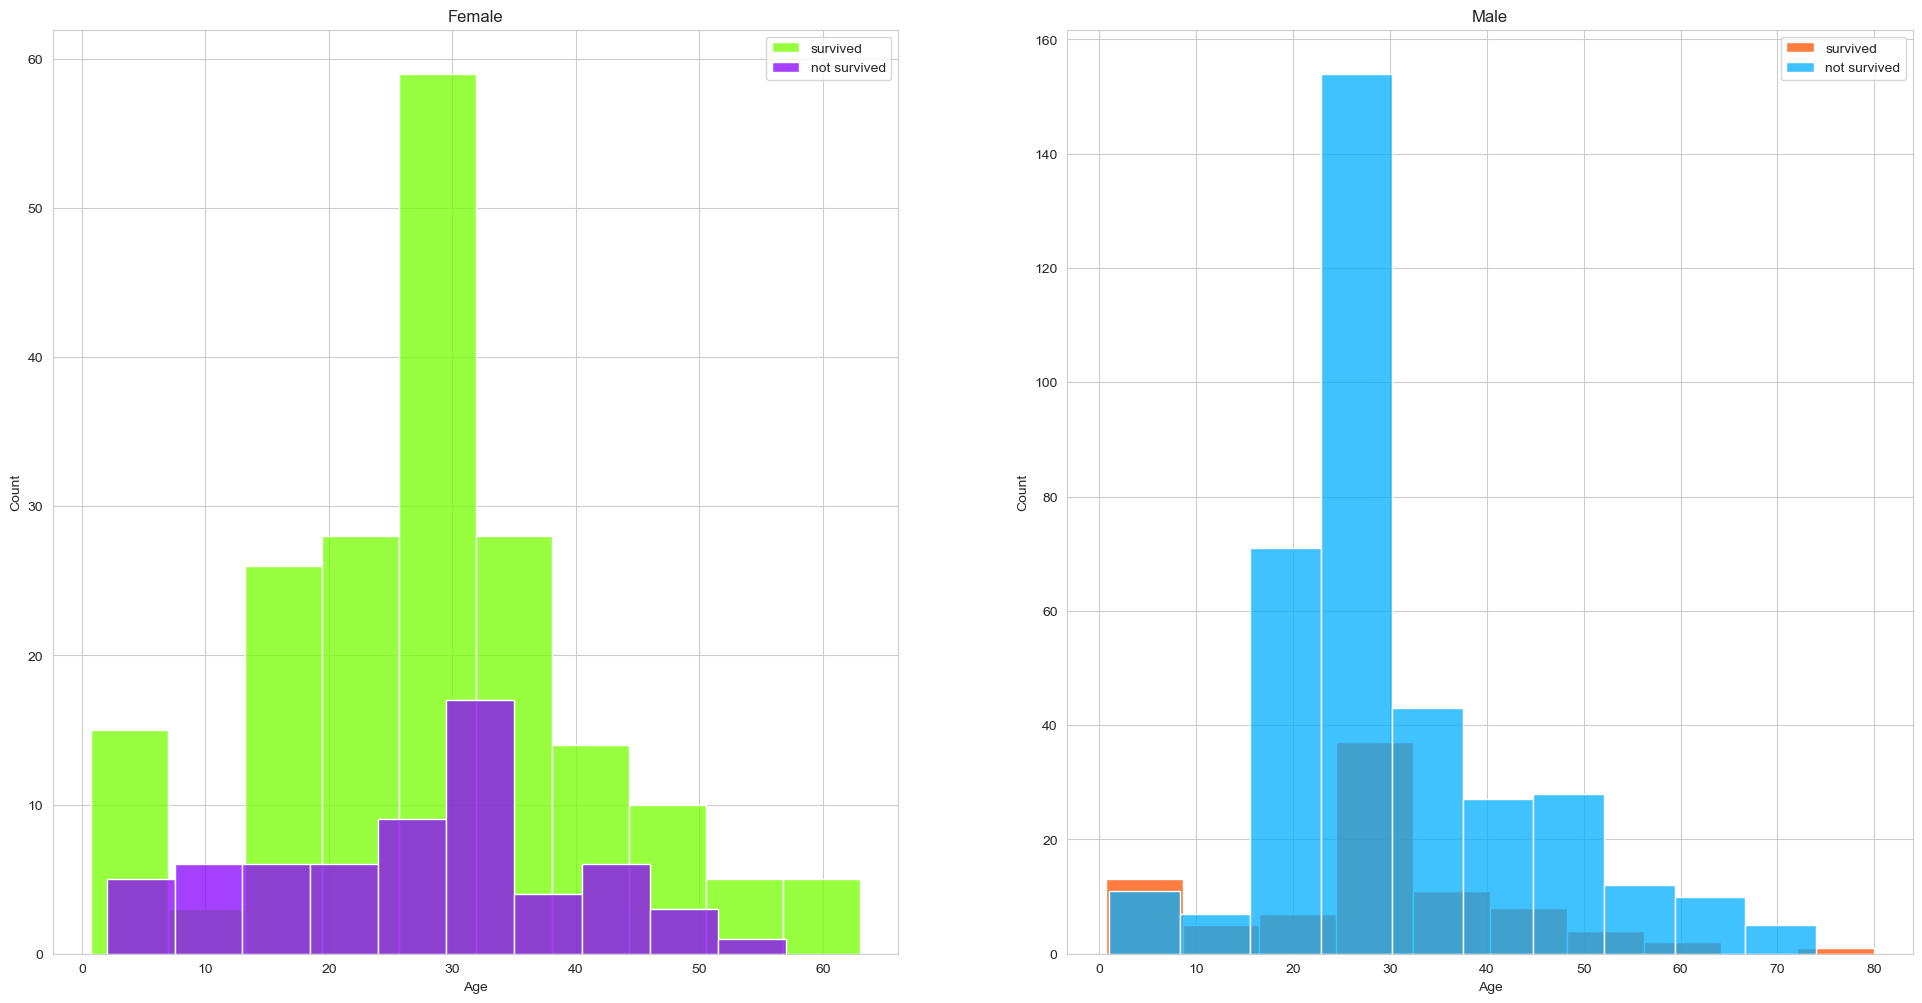

In [39]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24, 12))
women = train_set[train_set['Sex']==0]
men = train_set[train_set['Sex']==1]
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[0], kde =False, color="#76FF00")
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[0], kde =False, color="#8900FF")
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[1], kde = False, color="#FF5100")
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[1], kde = False, color="#00AEFF")
ax.legend()
_ = ax.set_title('Male')

In [40]:
# Define categories (survived, not survived)
categories = ['survived', 'not survived']

women_survived = train_set[(train_set["Sex"] == 1) & (train_set["Survived"] == 1)]  # survived women
women_not_survived = train_set[(train_set["Sex"] == 1) & (train_set["Survived"] == 0)]  # non-survived women
men_survived = train_set[(train_set["Sex"] == 0) & (train_set["Survived"] == 1)]  # Ages of survived men
men_not_survived = train_set[(train_set["Sex"] == 0) & (train_set["Survived"] == 0)]  # Ages of non-survived men


data = {'Category': ['survived men', 'survived women', 'not-survived women', 'not-survived men'], 
        'Survived': [len(men_survived), len(women_survived), len(women_not_survived), len(men_not_survived)]}


Survivors2 = pd.DataFrame.from_dict(data, orient='index').transpose()

# Display the DataFrame
Survivors2


,Category,Survived
0,survived men,193
1,survived women,88
2,not-survived women,368
3,not-survived men,63


In [41]:
# Making DataFrame for the histogram above
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

train_set['AgeGroup'] = pd.cut(train_set['Age'], bins=age_bins, labels=age_labels, right=False)

data = {
    'AgeGroup': age_labels,
    'Survived Women': [],
    'Not Survived Women': [],
    'Survived Men': [],
    'Not Survived Men': []
}

for age_group in age_labels:
    survived_women = len(train_set[(train_set['AgeGroup'] == age_group) & (train_set['Sex'] == 0) & (train_set['Survived'] == 1)])
    not_survived_women = len(train_set[(train_set['AgeGroup'] == age_group) & (train_set['Sex'] == 0) & (train_set['Survived'] == 0)])
    survived_men = len(train_set[(train_set['AgeGroup'] == age_group) & (train_set['Sex'] == 1) & (train_set['Survived'] == 1)])
    not_survived_men = len(train_set[(train_set['AgeGroup'] == age_group) & (train_set['Sex'] == 1) & (train_set['Survived'] == 0)])
    
    data['Survived Women'].append(survived_women)
    data['Not Survived Women'].append(not_survived_women)
    data['Survived Men'].append(survived_men)
    data['Not Survived Men'].append(not_survived_men)

survivors_by_age = pd.DataFrame(data)

survivors_by_age

,AgeGroup,Survived Women,Not Survived Women,Survived Men,Not Survived Men
0,0-10,16,9,15,12
1,11-20,28,8,5,44
2,21-30,75,28,33,180
3,31-40,44,7,19,59
4,41-50,18,9,9,35
5,51-60,9,2,4,23
6,61-70,3,0,2,10
7,71-80,0,0,0,5


# Feature engineering

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [42]:
def min_max_scale(series, feature_range=(1, -1)):
    min_val = series.min()
    max_val = series.max()
    scale = (feature_range[1] - feature_range[0]) / (max_val - min_val)
    scaled_series = scale * (series - min_val) + feature_range[0]
    return scaled_series

## KNN training:

In [43]:
x_train = train_set[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train = train_set['Survived']

In [44]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

# Naive Bayes training:

In [45]:
#defining a training function to NB algorithm:
def nb_train(train_set):
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    x_train = train_set[features]
    y_train = train_set['Survived']
    return x_train,y_train
x_train,y_train = nb_train(train_set)
display(x_train)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,54.000000,1,0,78.2667
1,2,0,45.000000,0,0,13.5000
2,3,1,20.000000,0,0,9.5000
3,3,1,36.000000,0,0,7.8958
4,3,1,22.000000,0,0,8.0500
...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625
708,3,1,14.000000,5,2,46.9000
709,2,0,6.000000,0,1,33.0000
710,2,1,29.699118,0,0,0.0000


## Part 4 - Apply on test and show model performance estimation

## KNN algorithm testing:

In [46]:
test_set = pd.read_csv("titanic_test.csv")

In [47]:
x_test = test_set[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_test = test_set['Survived']

In [48]:
y_predict = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
print("accuracy: ", accuracy)

accuracy:  0.7374301675977654


In [49]:
neighbors = np.arange(1, 100)
accuracy_scores=[]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

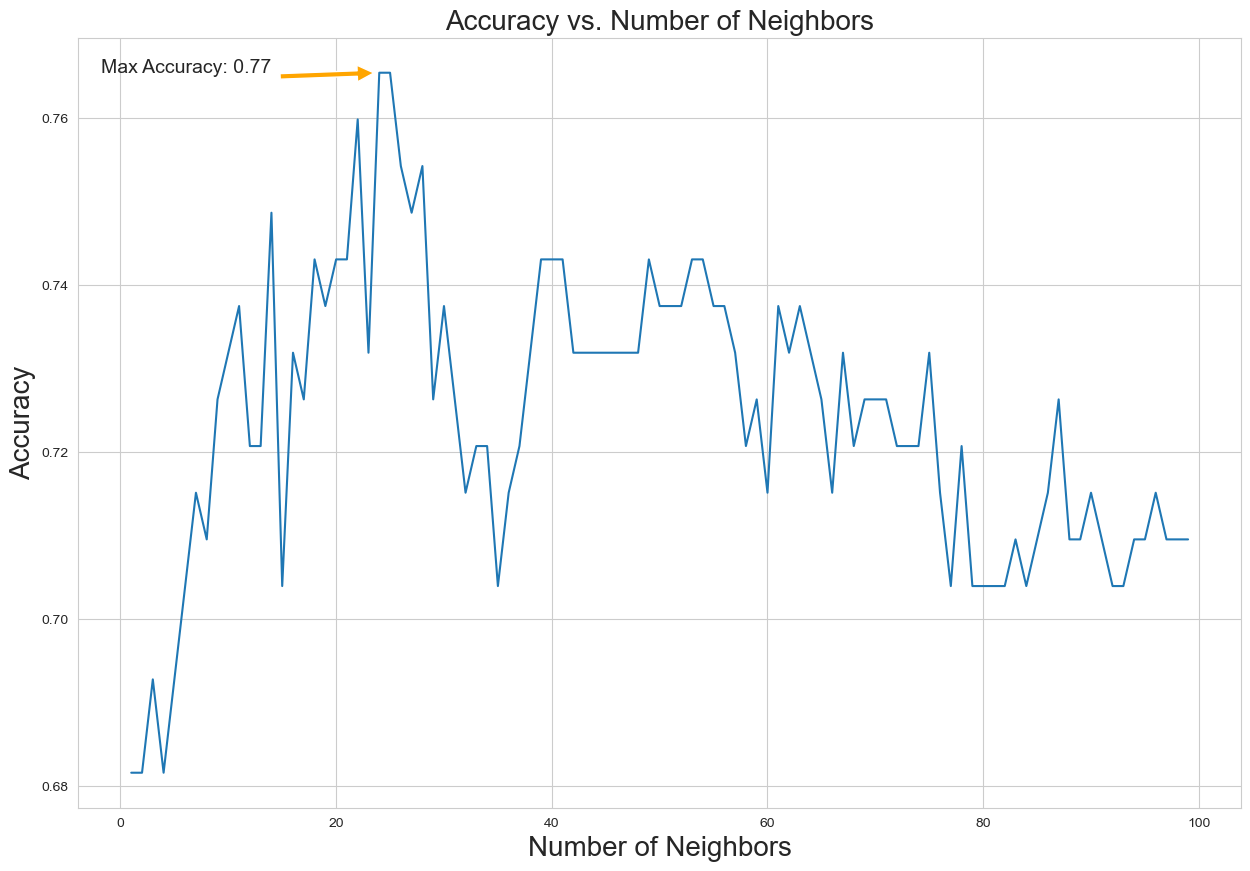

In [50]:
plt.figure(figsize=(15, 10))
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of Neighbors', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy vs. Number of Neighbors', fontsize=20)

# Finding the maximum accuracy and its corresponding neighbor
max_index = accuracy_scores.index(max(accuracy_scores))
max_neighbor = neighbors[max_index]
max_accuracy = accuracy_scores[max_index]

# Adding annotation
plt.annotate(f'Max Accuracy: {max_accuracy:.2f}', 
             xy=(max_neighbor, max_accuracy),  # Arrowhead position
             xytext=(max_neighbor-10, max_accuracy),  # Text position above the point
             arrowprops=dict(facecolor='orange', shrink=0.05),
             ha='right', fontsize=14)
plt.show()

## Naive Bayes algorithm testing:

In [51]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x_test = test_set[features]

Max accuracy for Naive Bayes algorithm: 0.768


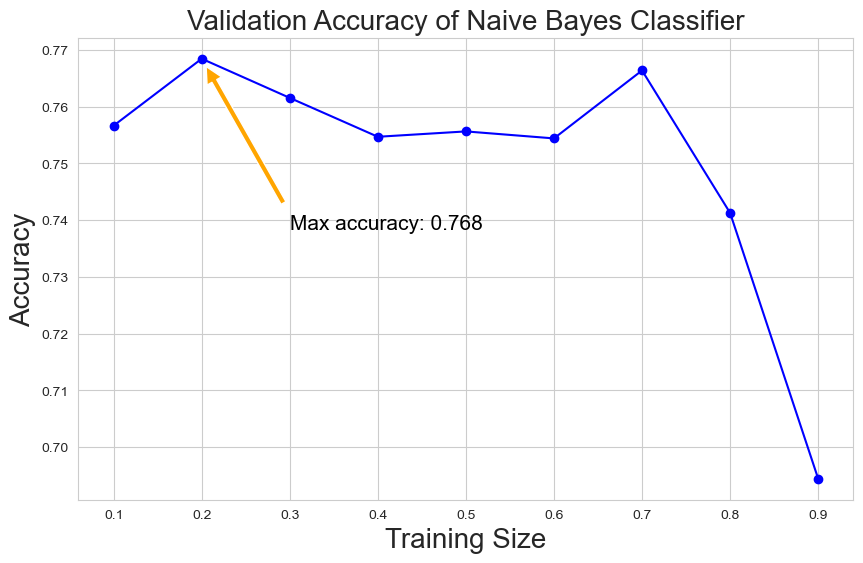

In [52]:
#defining a testing function for Naive Bayes:
def nb_test(x_train,y_train):
    nb = GaussianNB()
    training_sizes = np.linspace(0.1, 0.9, 9)
    accuracies = []
    for size in training_sizes:
        x_train_split,x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, train_size=size, random_state=42)
        nb.fit(x_train_split, y_train_split)
        val_predictions = nb.predict(x_val_split)
        accuracy = accuracy_score(y_val_split, val_predictions)
        accuracies.append(accuracy)
    max_accuracy = max(accuracies)
    max_index = accuracies.index(max_accuracy) #choosing the highest accuracy value from all accuracies

    return training_sizes,accuracies,max_accuracy,max_index

training_sizes, accuracies, max_accuracy,max_index = nb_test(x_train,y_train)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.annotate(
    f'Max accuracy: {max_accuracy:.3f}',
    xy=(training_sizes[max_index], accuracies[max_index]),
    xytext=(training_sizes[max_index] + 0.1, accuracies[max_index] - 0.030),
    arrowprops=dict(facecolor='orange', shrink=0.05),
    fontsize=15,
    color='black'
)

plt.xlabel('Training Size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Validation Accuracy of Naive Bayes Classifier', fontsize=20)
plt.grid(True)
print(f"Max accuracy for Naive Bayes algorithm: {max_accuracy:.3f}")
plt.show()